In [1]:
import pandas as pd
import glob
from pathlib import Path

fles=glob.glob(r"C:\Users\sa01ld\OneDrive - SAMS\teaching\H1-Marine-Field-Course-S2-2025\data\asc/*_1m.asc")

# Define the output Excel file
output_file = output_file = r"C:/Users/sa01ld/OneDrive - SAMS/teaching/H1-Marine-Field-Course-S2-2025/data/H1_MFC_all_stations.xlsx"

# Create a dictionary to store DataFrames with dynamic names
dataframes = {}

# list of df names
df_names=[]

# Example: Generate and name DataFrames in a loop
for i in fles:  # Change range as needed
        file_name_no_ext = Path(i).stem
        parts = file_name_no_ext.split("_")  # Split by "_"
        new_name = parts[4]  # Join from the 4th element onwards
        df_names.append(new_name)
        # Read the file into a DataFrame
        df = pd.read_csv(i, sep="\s+", encoding="latin-1", skiprows=1)
        
        # Rename columns based on the first line of the file (modify if needed)
        df.columns = [
            "Scan", "Day", "Month", "Year", "Time", "Pres", "Temp", "Cond (S/cm)", "PAR",
            "Fl", "Ox (Mm/L)", "OxOPS", "Dep", "Salt", "Sigma-t", "Sv", "Flag"
        ]
        
        # Merge Date and Time into a single datetime column
        df["Datetime"] = pd.to_datetime(df["Day"].astype(str) + " " + 
                                        df["Month"] + " " + 
                                        df["Year"].astype(str) + " " + 
                                        df["Time"], format="%d %b %Y %H:%M:%S")
        
        # Drop old columns (Day, Month, Year, Time) since we now have Datetime
        df.drop(columns=["Day", "Month", "Year", "Time"], inplace=True)
        
        # Reorder columns so Datetime is first and depth is 2nd
        df = df[["Datetime"] + [col for col in df.columns if col != "Datetime"]]
        cols = list(df.columns)
        # Move the 10th column (index 9) to the 2nd position (index 1)
        col_to_move = cols.pop(9)  # Remove the 10th column
        cols.insert(2, col_to_move)  # Insert it at the 2nd position
        
        # Reorder the DataFrame
        df = df[cols]
    
        name = f"{new_name}"  # Generate a dynamic name
        dataframes[name] = df  # assign the df

# Save all DataFrames to an Excel file with named sheets
with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    for sheet_name, data in dataframes.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"File saved successfully as {output_file}")

File saved successfully as C:/Users/sa01ld/OneDrive - SAMS/teaching/H1-Marine-Field-Course-S2-2025/data/H1_MFC_all_stations.xlsx


In [2]:
etive_names=['re2',
 're3',
 're5-6',
 're5a',
 're5',
 're6',
 're7',
 're8',
 're9',
 're9a']
creran_names=['ly1a',
 'ly1',
 'ly3a',
 'ly3',
 'ly4',
 'swf']

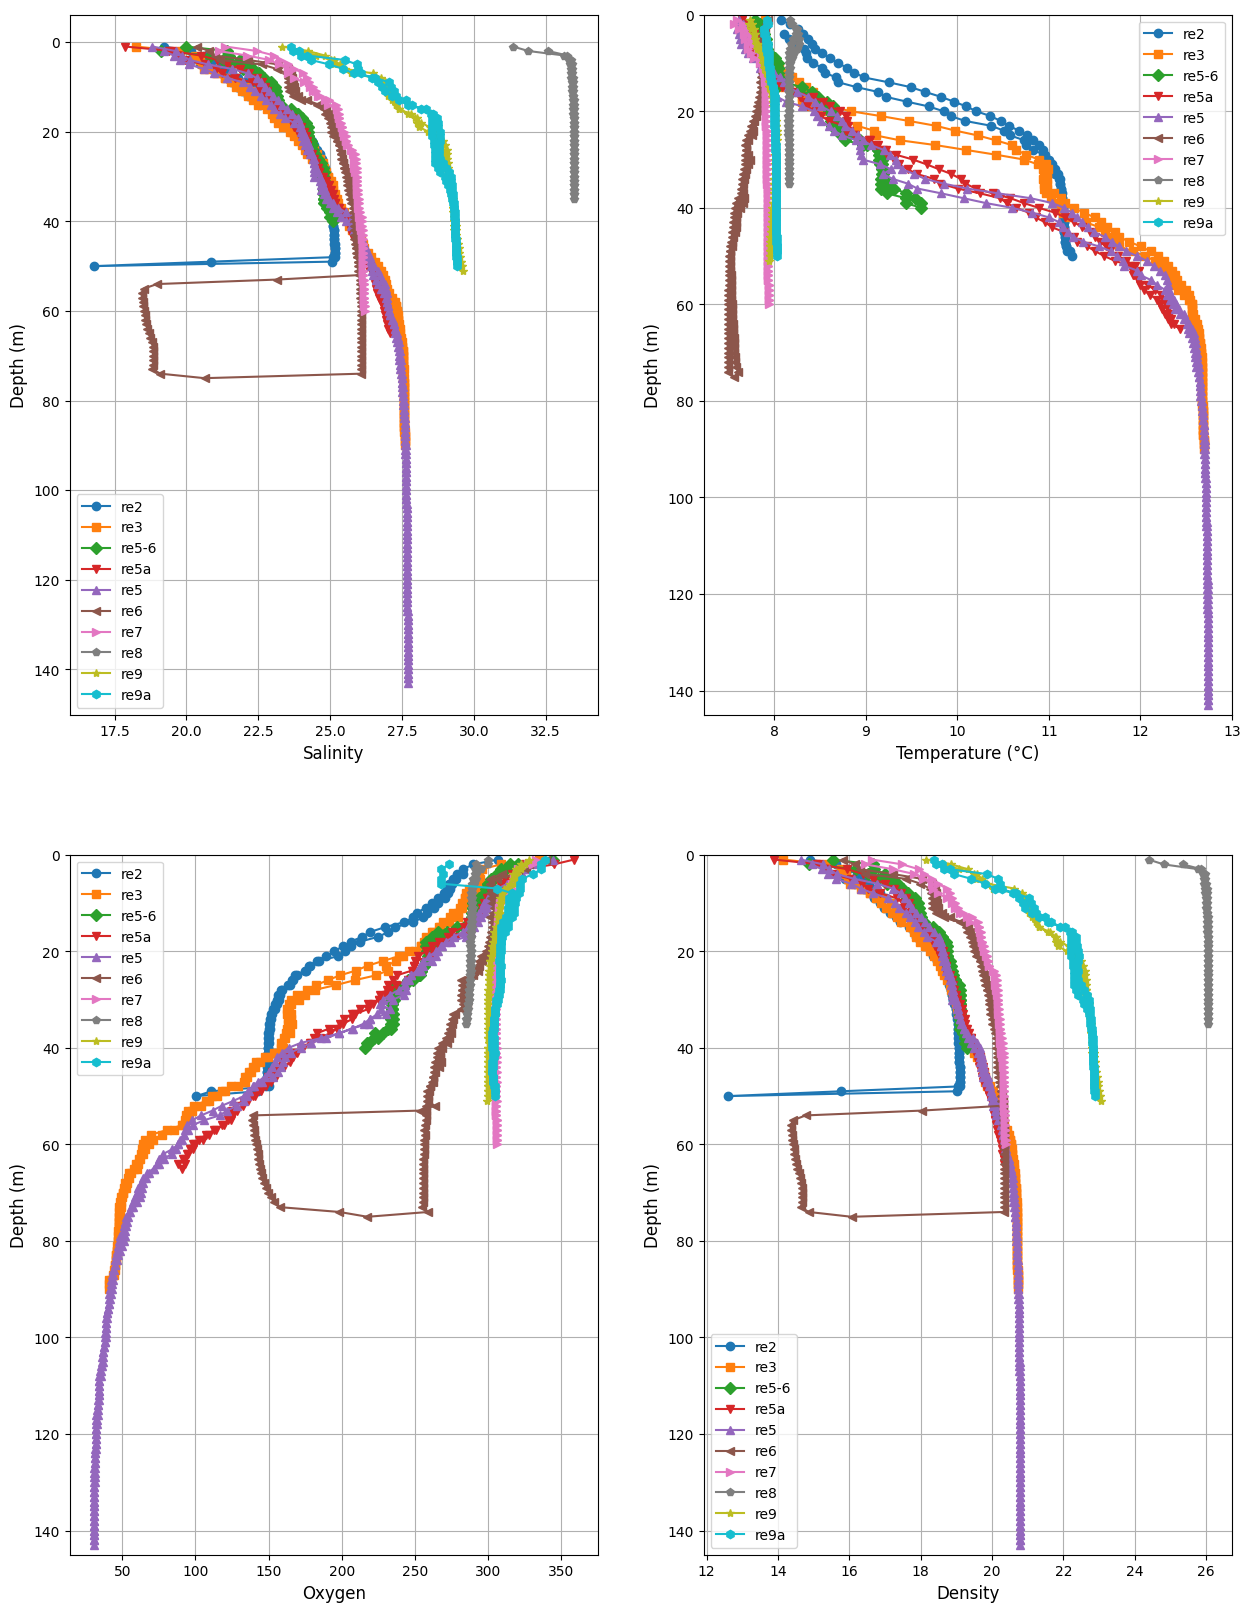

In [7]:
import matplotlib.pyplot as plt

markers = ['o', 's', 'D', 'v', '^', '<', '>', 'p', '*', 'h', '+']

# plot loch etive temperature
fig, axes = plt.subplots(2,2,figsize=(15,20))
for i,name in enumerate(etive_names):
    # df=dataframes[i].groupby('Dep',as_index=False).mean()
    df=dataframes[name]
    x=df.Temp
    s=df.Salt
    y=df.Dep
    d=df["Sigma-t"]	
    o=df["Ox (Mm/L)"]
    axes[0,1].plot(x,y,marker=markers[i],label=name,)
    axes[0,0].plot(s,y,marker=markers[i],label=name,)
    axes[1,1].plot(d,y,marker=markers[i],label=name,)
    axes[1,0].plot(o,y,marker=markers[i],label=name,)

    
axes[0,0].set_xlabel("Salinity", fontsize=12)
axes[0,0].set_ylabel("Depth (m)", fontsize=12)
axes[0,0].invert_yaxis()
axes[0,0].legend()
axes[0,0].grid()
    

axes[0,1].set_xlabel("Temperature (°C)", fontsize=12)
axes[0,1].set_ylabel("Depth (m)", fontsize=12)
axes[0,1].set_ylim(0,145)
axes[0,1].invert_yaxis()
axes[0,1].legend()
axes[0,1].grid()

axes[1,1].set_xlabel("Density", fontsize=12)
axes[1,1].set_ylabel("Depth (m)", fontsize=12)
axes[1,1].set_ylim(0,145)
axes[1,1].invert_yaxis()
axes[1,1].legend()
axes[1,1].grid()


axes[1,0].set_xlabel("Oxygen", fontsize=12)
axes[1,0].set_ylabel("Depth (m)", fontsize=12)
axes[1,0].set_ylim(0,145)
axes[1,0].invert_yaxis()
axes[1,0].legend()
axes[1,0].grid()

figfile= r"C:/Users/sa01ld/OneDrive - SAMS/teaching/H1-Marine-Field-Course-S2-2025/figs/etive.png"
fig.savefig(figfile, dpi=100, facecolor='white')


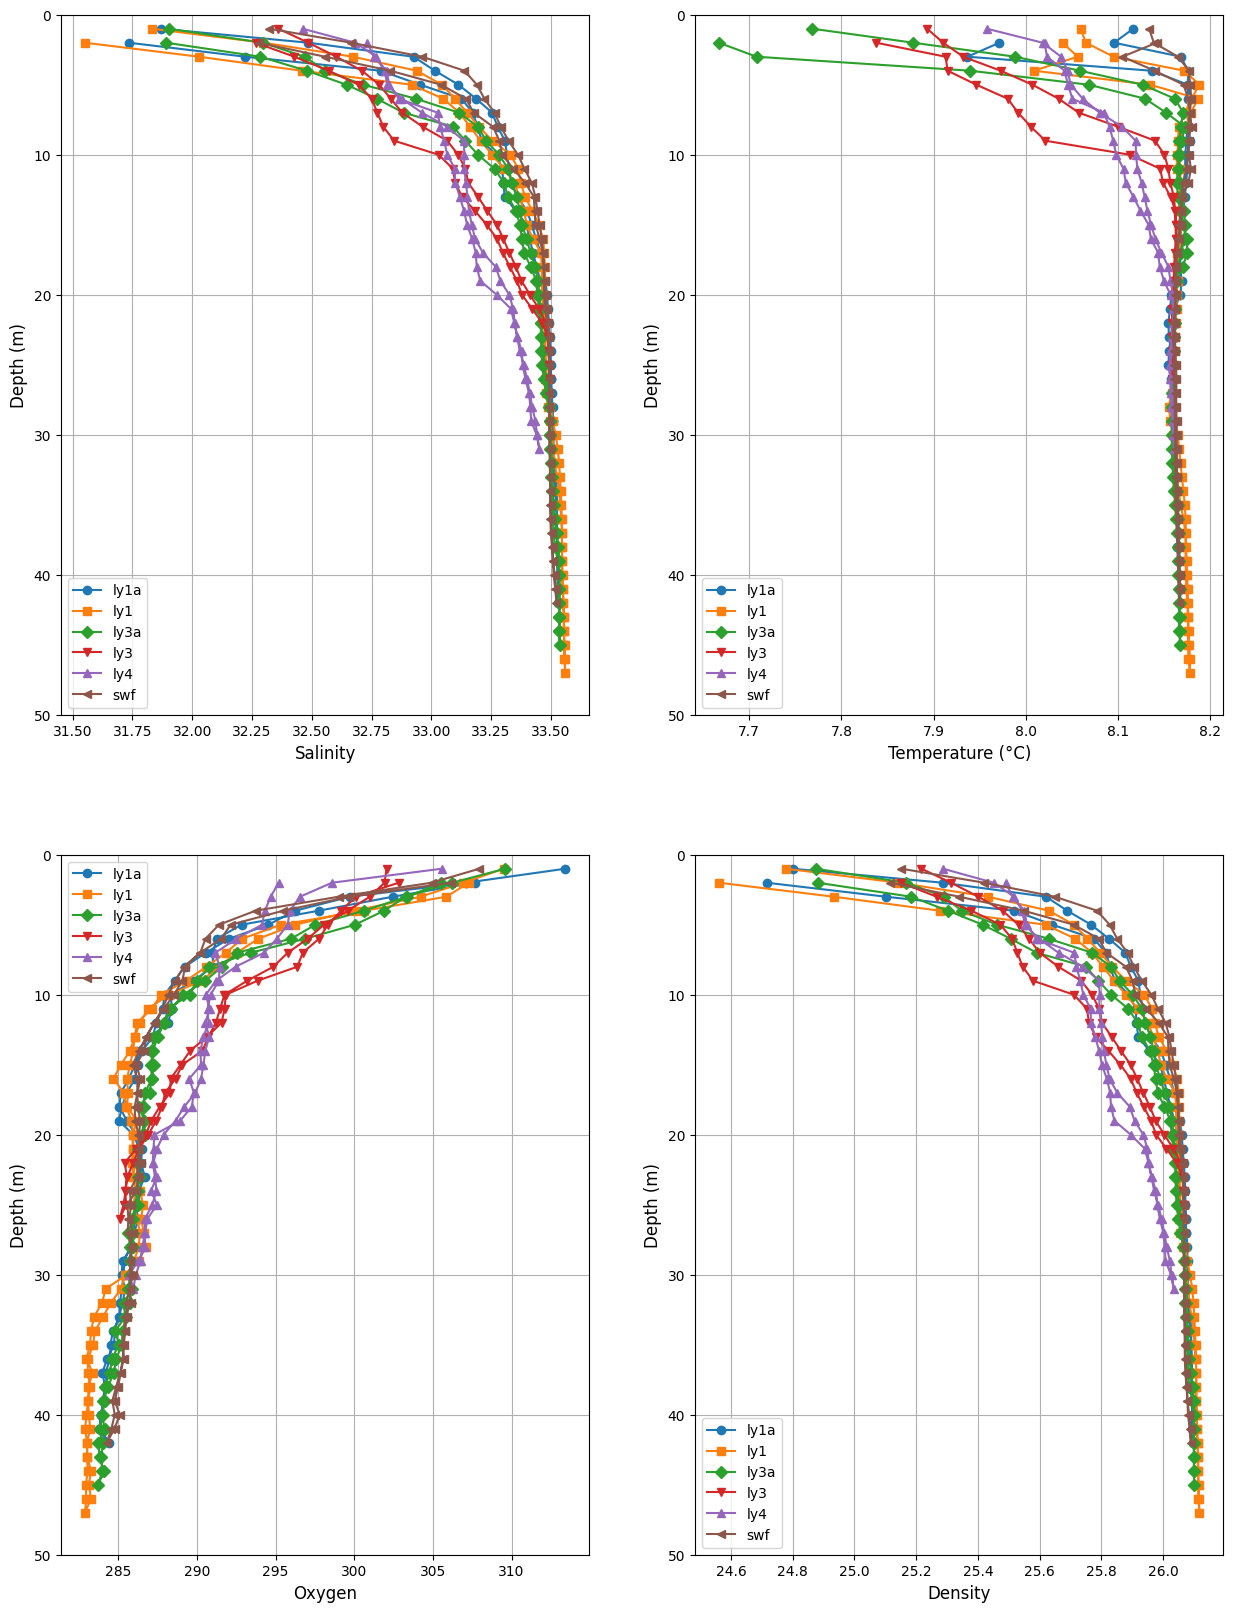

In [9]:
import matplotlib.pyplot as plt

markers = ['o', 's', 'D', 'v', '^', '<', '>', 'p', '*', 'h', '+']

# plot loch etive temperature
fig, axes = plt.subplots(2,2,figsize=(15,20))
for i,name in enumerate(creran_names):
    # df=dataframes[i].groupby('Dep',as_index=False).mean()
    df=dataframes[name]
    x=df.Temp
    s=df.Salt
    y=df.Dep
    d=df["Sigma-t"]	
    o=df["Ox (Mm/L)"]
    axes[0,1].plot(x,y,marker=markers[i],label=name,)
    axes[0,0].plot(s,y,marker=markers[i],label=name,)
    axes[1,1].plot(d,y,marker=markers[i],label=name,)
    axes[1,0].plot(o,y,marker=markers[i],label=name,)

    
axes[0,0].set_xlabel("Salinity", fontsize=12)
axes[0,0].set_ylabel("Depth (m)", fontsize=12)
axes[0,0].set_ylim(0,50)
axes[0,0].invert_yaxis()
axes[0,0].legend()
axes[0,0].grid()
    

axes[0,1].set_xlabel("Temperature (°C)", fontsize=12)
axes[0,1].set_ylabel("Depth (m)", fontsize=12)
axes[0,1].set_ylim(0,50)
axes[0,1].invert_yaxis()
axes[0,1].legend()
axes[0,1].grid()

axes[1,1].set_xlabel("Density", fontsize=12)
axes[1,1].set_ylabel("Depth (m)", fontsize=12)
axes[1,1].set_ylim(0,50)
axes[1,1].invert_yaxis()
axes[1,1].legend()
axes[1,1].grid()


axes[1,0].set_xlabel("Oxygen", fontsize=12)
axes[1,0].set_ylabel("Depth (m)", fontsize=12)
axes[1,0].set_ylim(0,50)
axes[1,0].invert_yaxis()
axes[1,0].legend()
axes[1,0].grid()

figfile= r"C:/Users/sa01ld/OneDrive - SAMS/teaching/H1-Marine-Field-Course-S2-2025/figs/creran.png"
fig.savefig(figfile, dpi=100, facecolor='white')
